In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import gensim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Embedding,Bidirectional,LSTM,Dropout,Dense
from tensorflow.keras.models import Sequential
from keras.initializers import Constant
from keras.optimizers import SGD
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [2]:
df=pd.read_csv('languages.csv')
df.head()

,text,language
0,ich denke es handelt sich hier um ein missvers...,german
1,ich habe tom gerade erst verlassen,german
2,tom versuchte mary nur zu ärgern,german
3,tom hat mir die hand geküsst,german
4,ich wusste dass dir das gefiele,german


In [3]:
df.shape

(763684, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763684 entries, 0 to 763683
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      763684 non-null  object
 1   language  763684 non-null  object
dtypes: object(2)
memory usage: 11.7+ MB


In [5]:
df.isnull().values.any()

False

In [6]:
df.isnull().sum()

text        0
language    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['text'][0]

'ich denke es handelt sich hier um ein missverständnis'

In [9]:
df['text'][1]

'ich habe tom gerade erst verlassen'

In [10]:
df['text'][2]

'tom versuchte mary nur zu ärgern'

In [11]:
df['language'].value_counts()

language
english    275687
german     199618
french     169693
spanish    118686
Name: count, dtype: int64

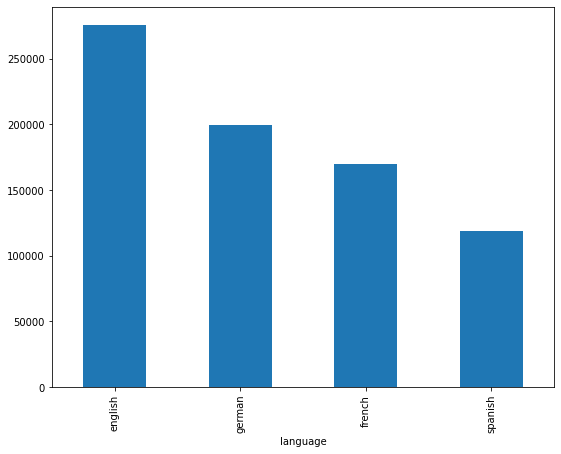

In [12]:
plt.figure(figsize=(9,7))
df['language'].value_counts().plot(kind='bar')
plt.show()

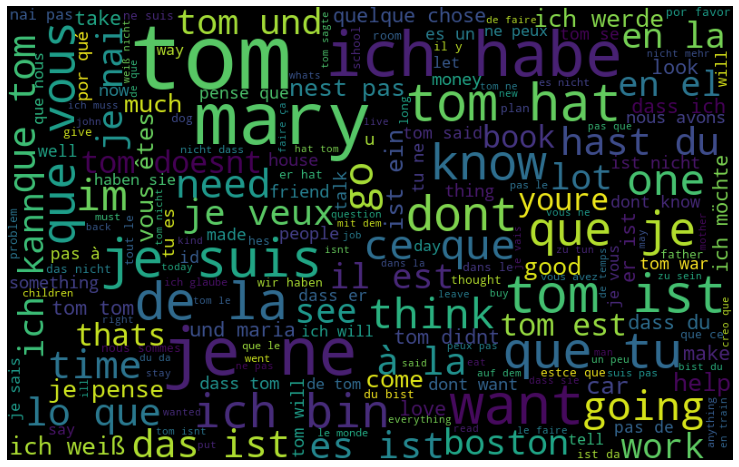

In [13]:
plt.figure(figsize=(13,18))
all_sen=' '.join([sentence for sentence in df['text']])
wordcloud_all=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_sen)
plt.imshow(wordcloud_all)
plt.axis('off')
plt.show()

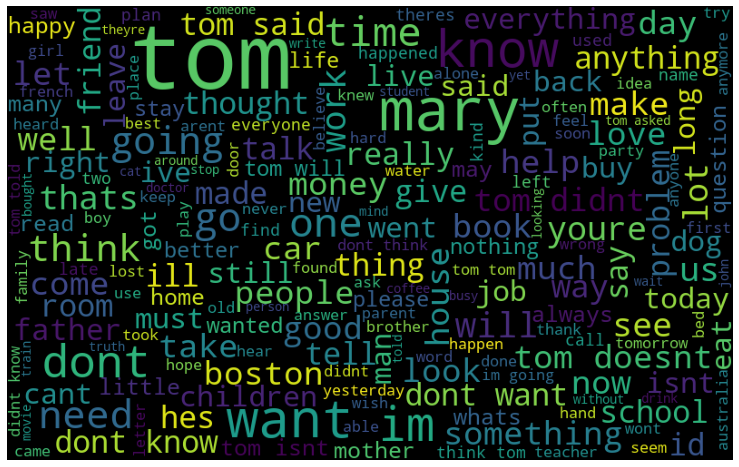

In [14]:
plt.figure(figsize=(13,18))
en_sen=' '.join(df['text'][df['language']=='english'].tolist())
wordcloud_en=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(en_sen)
plt.imshow(wordcloud_en)
plt.axis('off')
plt.show()

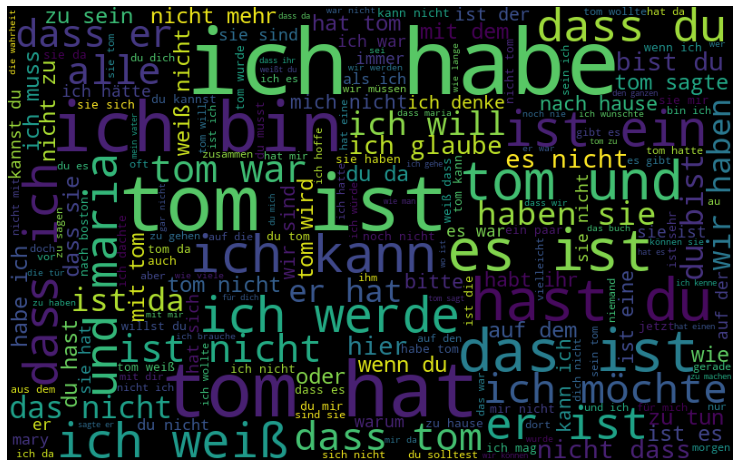

In [15]:
plt.figure(figsize=(13,18))
ge_sen=' '.join([sentence for sentence in df['text'][df['language']=='german']])
wordcloud_ge=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(ge_sen)
plt.imshow(wordcloud_ge)
plt.axis('off')
plt.show()

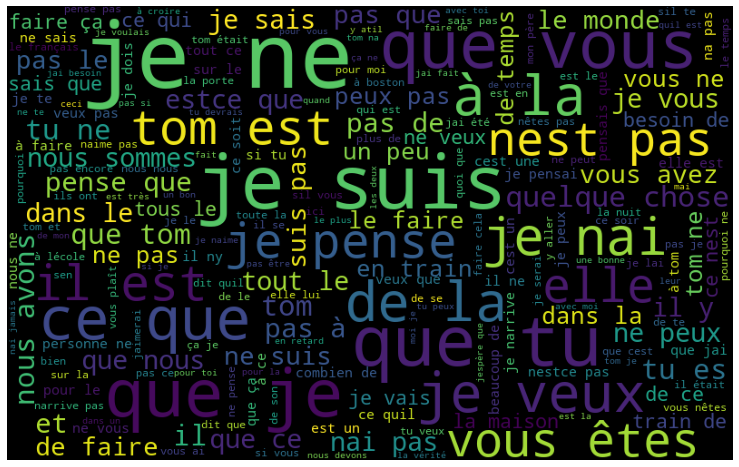

In [16]:
plt.figure(figsize=(13,18))
fr_sen=' '.join(df['text'][df['language']=='french'].tolist())
wordcloud_fr=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(fr_sen)
plt.imshow(wordcloud_fr)
plt.axis('off')
plt.show()

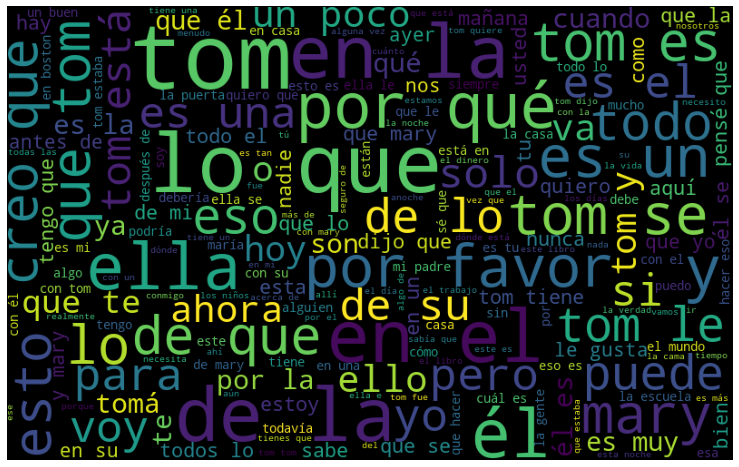

In [17]:
plt.figure(figsize=(13,18))
sp_sen=' '.join([sentence for sentence in df['text'][df['language']=='spanish']])
wordcloud_sp=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(sp_sen)
plt.imshow(wordcloud_sp)
plt.axis('off')
plt.show()

In [18]:
english_stop=stopwords.words('english')

In [19]:
english_stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
german_stop=stopwords.words('german')

In [21]:
german_stop[:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [22]:
french_stop=stopwords.words('french')

In [23]:
french_stop[:10]

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [24]:
spanish_stop=stopwords.words('spanish')
spanish_stop[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [25]:
lemmatizer=WordNetLemmatizer()

In [26]:
def text_preprocessing(text):
    pattern=re.compile('[<^[>+]]')
    text_a=pattern.sub('',text)
    text_b=re.sub('[^A-Za-z]',' ',text_a)
    text_c=re.sub('\s+[a-zA-Z]\s+',' ',text_b)
    text_d=re.sub('\s+',' ',text_c)
    word_a=text_d.lower().split()
    word_b_a=[word for word in word_a if not word in english_stop]
    word_b_b=[word for word in word_b_a if not word in german_stop]
    word_b_c=[word for word in word_b_b if not word in french_stop]
    word_b_d=[word for word in word_b_c if not word in spanish_stop]
    word_c=[lemmatizer.lemmatize(word) for word in word_b_d]
    return ' '.join(word_c)

In [27]:
df['clean_text']=df['text'].apply(text_preprocessing)

In [28]:
pd.set_option('max_colwidth',1)

In [29]:
df.sample(5)

,text,language,clean_text
369387,cuanto más lo explicas menos lo entiendo,spanish,cuanto explicas menos entiendo
375031,juntémonos y conversémoslo,spanish,junt mono convers moslo
51191,ich hatte beschlossen das nicht mehr zu tun,german,beschlossen mehr tun
457830,tom le preguntó a mary si sabía cuándo empezó el concierto,spanish,tom pregunt mary si sab cu ndo empez concierto
388048,tom no se acuerda de su abuelo,spanish,tom acuerda abuelo


In [30]:
df.drop(columns=['text'],axis=1,inplace=True)
df.sample(5)

,language,clean_text
611379,english,problem isnt going go away
241597,french,exp rience traumatisante
484199,spanish,tom pregunt cuanto amos pagado
699908,english,dont want get haircut
519230,english,little wine left bottom glass


In [31]:
le=LabelEncoder()

In [32]:
df['language']=le.fit_transform(df['language'])

In [33]:
df.sample(5)

,language,clean_text
141916,2,tom arbeit tag beenden
17226,2,neue wirtschaftsplan regierung sst nschen brig
476196,3,ojal hablara franc nativo
423616,3,solo contestaste pregunta
281267,1,questce


In [34]:
df['language'].value_counts()

language
0    275687
2    199618
1    169693
3    118686
Name: count, dtype: int64

In [35]:
X=df.drop(columns=['language'],axis='columns')
y=df['language']

In [36]:
X

,clean_text
0,denke handelt missverst ndnis
1,tom gerade erst verlassen
2,tom versuchte mary rgern
3,tom hand gek sst
4,wusste gefiele
...,...
763679,noisy cant hear think
763680,born
763681,promise ill quiet
763682,isnt french


In [37]:
y

0         2
1         2
2         2
3         2
4         2
         ..
763679    0
763680    0
763681    0
763682    0
763683    0
Name: language, Length: 763684, dtype: int32

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [39]:
X_train.shape

(610947, 1)

In [40]:
X_test.shape

(152737, 1)

In [41]:
y_train.value_counts()

language
0    220550
2    159694
1    135754
3    94949 
Name: count, dtype: int64

In [42]:
y_test.value_counts()

language
0    55137
2    39924
1    33939
3    23737
Name: count, dtype: int64

In [43]:
X_train

,clean_text
205191,nai jamais pen vraiment fait
333324,cessaire faire cela
641297,box opened
353784,toutes affaire disparu
658791,cant leave
...,...
334632,tom aimerait fils rite biens
721346,president truman make difficult decision
83944,tom spricht laut
165798,reise alleine


In [44]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X['clean_text'])
X_train=tokenizer.texts_to_sequences(X_train['clean_text'])
X_test=tokenizer.texts_to_sequences(X_test['clean_text'])

In [45]:
tokenizer.word_index['good']

29

In [46]:
len(tokenizer.word_index)

88881

In [47]:
X_train[0]

[102, 96, 203, 114, 30]

In [48]:
X_train[1]

[2249, 12, 59]

In [49]:
X_train_length=[]
for i in X_train:
    X_train_length.append(len(i))
print(max(X_train_length))

40


In [50]:
X_test_length=[]
for i in X_test:
    X_test_length.append(len(i))
print(max(X_test_length))

42


In [51]:
maxlen=42
padded_X_train=pad_sequences(X_train,maxlen=maxlen,padding='post')
padded_X_test=pad_sequences(X_test,maxlen=maxlen,padding='post')

In [52]:
padded_X_train[0]

array([102,  96, 203, 114,  30,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0])

In [53]:
padded_X_train[1]

array([2249,   12,   59,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [54]:
splited_X=[]
for i in X['clean_text']:
    splited_X.append(i.split())

In [55]:
splited_X[0]

['denke', 'handelt', 'missverst', 'ndnis']

In [56]:
DIM=100
w2v_model=gensim.models.Word2Vec(splited_X,vector_size=DIM,window=10,min_count=1)

In [57]:
w2v_model.wv['good']

array([-0.23300715,  2.595208  ,  2.4421434 ,  1.3761383 ,  0.6839679 ,
       -0.6962271 ,  1.1030384 , -0.2177333 , -1.0094066 ,  1.2290907 ,
       -0.39286032, -0.05797715,  0.6785802 ,  0.10477784, -1.2528123 ,
        0.1948242 , -0.35351148, -0.27620268, -2.185677  ,  0.70315135,
        1.2374012 ,  2.2979624 ,  1.554982  ,  1.4135059 ,  0.14201233,
       -0.8220912 ,  1.040027  ,  1.5018914 , -1.1858956 ,  0.11990236,
       -0.83951795, -0.7078585 , -0.50598854, -3.240729  , -1.2064102 ,
       -0.7718971 ,  0.6236108 , -0.51054746,  0.42843702,  0.9251225 ,
       -1.5860326 , -1.427535  , -1.4934484 ,  0.33750564,  1.4263529 ,
        1.169507  , -0.5536626 , -0.92960685, -0.51564145,  0.8655123 ,
       -0.23025076, -1.2921152 ,  0.78448015, -1.2705189 ,  0.2737359 ,
       -0.29809397,  1.2344505 , -0.9291677 , -0.57375735,  1.5090257 ,
        0.37747806,  0.3560498 , -1.329577  , -0.4429794 , -0.7626867 ,
        0.41519603, -0.21576117,  0.22278246,  1.0102793 , -0.95

In [58]:
w2v_model.wv.most_similar('good')

[('great', 0.8870029449462891),
 ('perfect', 0.8868345618247986),
 ('excellent', 0.875114917755127),
 ('amazing', 0.8630128502845764),
 ('wonderful', 0.8567004203796387),
 ('bad', 0.8550376296043396),
 ('nice', 0.8539597392082214),
 ('easy', 0.8516263961791992),
 ('depends', 0.8486440777778625),
 ('strong', 0.8483478426933289)]

In [59]:
w2v_model.wv.most_similar('phone')

[('telephone', 0.8335180878639221),
 ('message', 0.7975924015045166),
 ('note', 0.7670043706893921),
 ('cell', 0.7589753270149231),
 ('number', 0.7536062002182007),
 ('email', 0.74922114610672),
 ('permission', 0.73844313621521),
 ('ambulance', 0.7337756156921387),
 ('mobile', 0.7324494123458862),
 ('rang', 0.7280392646789551)]

In [60]:
w2v_model.wv.similarity(w1='sport',w2='ball')

0.5937399

In [61]:
w2v_model.wv.similarity(w1='sport',w2='nine')

0.30661044

In [62]:
vocab_size=len(tokenizer.word_index) + 1

In [63]:
vocab_size

88882

In [64]:
def embedding(model):
    embedding_matrix=np.zeros((vocab_size,DIM))
    for word,index in tokenizer.word_index.items():
        embedding_matrix[index]=w2v_model.wv[word]
        return embedding_matrix

In [65]:
embedding_vectors=embedding(w2v_model)

In [66]:
embedding_vectors[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [67]:
embedding_vectors[1]

array([-0.4928    ,  1.82535756,  0.07420483,  0.75624794,  1.37074721,
       -0.98799062,  0.12351328,  0.01028557, -0.46673933, -0.66297913,
        0.71662611, -0.3373346 , -0.81974626,  0.16913503,  0.94635803,
       -0.54261416, -0.06834057, -1.11966431, -2.62098861, -1.22566807,
       -0.41287538,  0.17103788,  0.99908334, -0.82060128,  0.77193499,
        1.75290084,  0.25929797,  1.92784584, -0.85650307,  0.52614665,
        0.12935574,  0.2785432 , -0.10905437,  0.44062135,  0.88863659,
       -0.38419259,  0.04671117, -0.30922267, -0.67904693, -1.51476383,
        0.26463854,  0.87370682, -0.12989718, -0.11382356, -0.82164997,
        0.58891875, -1.61351395,  0.46792185, -0.62795532, -0.04074683,
       -0.90137994, -0.66116679, -0.45565489, -0.77186787, -0.75280029,
        0.23574704,  1.15415812,  0.53598803, -0.9366408 ,  0.75000697,
        1.34982812,  0.19805196,  0.18103677, -0.40486503,  1.1988771 ,
        0.75198567, -0.104482  ,  1.30162454,  1.00509536, -1.49

In [68]:
epochs=10
learning_rate=0.1
decay_rate=learning_rate/epochs
momentum=0.8
sgd=SGD(learning_rate=learning_rate,momentum=momentum,decay=decay_rate,nesterov=False)
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,embeddings_initializer=Constant(embedding_vectors),trainable=False))
model.add(Conv1D(32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(4,activation='softmax'))

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [69]:
model.compile(optimizer=sgd,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [70]:
hist=model.fit(padded_X_train,y_train,epochs=epochs,validation_split=0.2,batch_size=64,verbose=1)

Epoch 1/10
7637/7637 ━━━━━━━━━━━━━━━━━━━━ 371s 47ms/step - accuracy: 0.6818 - loss: 0.7360 - val_accuracy: 0.9277 - val_loss: 0.1796
Epoch 2/10
7637/7637 ━━━━━━━━━━━━━━━━━━━━ 368s 48ms/step - accuracy: 0.9276 - loss: 0.2040 - val_accuracy: 0.9344 - val_loss: 0.1430
Epoch 3/10
7637/7637 ━━━━━━━━━━━━━━━━━━━━ 367s 48ms/step - accuracy: 0.9358 - loss: 0.1463 - val_accuracy: 0.9351 - val_loss: 0.1401
Epoch 4/10
7637/7637 ━━━━━━━━━━━━━━━━━━━━ 343s 45ms/step - accuracy: 0.9396 - loss: 0.1345 - val_accuracy: 0.9372 - val_loss: 0.1347
Epoch 5/10
7637/7637 ━━━━━━━━━━━━━━━━━━━━ 344s 45ms/step - accuracy: 0.9406 - loss: 0.1290 - val_accuracy: 0.9376 - val_loss: 0.1353
Epoch 6/10
7637/7637 ━━━━━━━━━━━━━━━━━━━━ 344s 45ms/step - accuracy: 0.9422 - loss: 0.1257 - val_accuracy: 0.9383 - val_loss: 0.1349
Epoch 7/10
7637/7637 ━━━━━━━━━━━━━━━━━━━━ 346s 45ms/step - accuracy: 0.9429 - loss: 0.1243 - val_accuracy: 0.9370 - val_loss: 0.1383
Epoch 8/10
7637/7637 ━━━━━━━━━━━━━━━━━━━━ 345s 45ms/step - accuracy: 

In [72]:
model.evaluate(padded_X_test,y_test)

4774/4774 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9385 - loss: 0.1321


[0.1316220909357071, 0.9385806918144226]

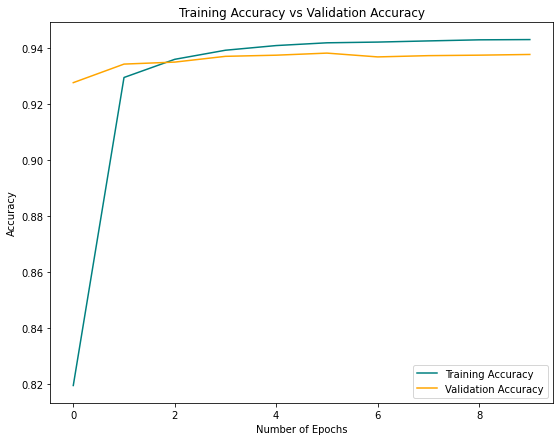

In [75]:
plt.figure(figsize=(9,7))
plt.plot(hist.history['accuracy'],color='teal',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

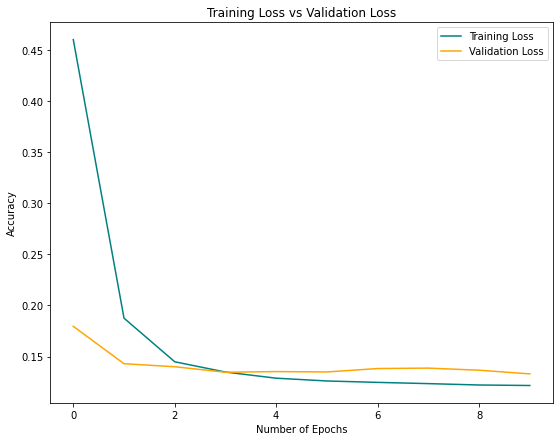

In [76]:
plt.figure(figsize=(9,7))
plt.plot(hist.history['loss'],color='teal',label='Training Loss')
plt.plot(hist.history['val_loss'],color='orange',label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [87]:
text=['i bought a laptop last week']
text_re=tokenizer.texts_to_sequences(text)
text_padded=pad_sequences(text_re,maxlen=42,padding='post')
y_predicted=model.predict(text_padded)
y_pre=np.argmax(y_predicted)
if y_pre==0:
    print('This text is written in English')
elif y_pred==1:
    print('This text is written in French')
elif y_pred==2:
    print('This text is written in German')
else:
    print('This text is written in Spanish')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This text is written in English


In [88]:
text=['Ich habe letzte Woche einen Laptop gekauft']
text_re=tokenizer.texts_to_sequences(text)
text_padded=pad_sequences(text_re,maxlen=42,padding='post')
y_predicted=model.predict(text_padded)
y_pre=np.argmax(y_predicted)
if y_pre==0:
    print('This text is written in English')
elif y_pre==1:
    print('This text is written in French')
elif y_pre==2:
    print('This text is written in German')
else:
    print('This text is written in Spanish')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This text is written in German


In [89]:
text=["j'ai acheté un ordinateur portable la semaine dernière"]
text_re=tokenizer.texts_to_sequences(text)
text_padded=pad_sequences(text_re,maxlen=42,padding='post')
y_predicted=model.predict(text_padded)
y_pre=np.argmax(y_predicted)
if y_pre==0:
    print('This text is written in English')
elif y_pre==1:
    print('This text is written in French')
elif y_pre==2:
    print('This text is written in German')
else:
    print('This text is written in Spanish')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This text is written in French


In [90]:
text=['Compré una computadora portátil la semana pasada']
text_re=tokenizer.texts_to_sequences(text)
text_padded=pad_sequences(text_re,maxlen=42,padding='post')
y_predicted=model.predict(text_padded)
y_pre=np.argmax(y_predicted)
if y_pre==0:
    print('This text is written in English')
elif y_pre==1:
    print('This text is written in French')
elif y_pre==2:
    print('This text is written in German')
else:
    print('This text is written in Spanish')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This text is written in Spanish


In [105]:
predictions=model.predict(padded_X_test)
predictions[:5]

4774/4774 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step


array([[1.5790164e-08, 1.1109296e-09, 1.0000000e+00, 3.9581327e-08],
       [5.0508775e-06, 9.9998748e-01, 4.1011810e-07, 7.0663550e-06],
       [2.3877780e-07, 9.9999964e-01, 2.6085759e-08, 1.2151668e-07],
       [1.3786128e-05, 9.9997723e-01, 9.4339833e-07, 7.9655856e-06],
       [1.0000000e+00, 2.0336595e-08, 2.6621125e-08, 1.0997222e-09]],
      dtype=float32)

In [108]:
y_predictions=[np.argmax(i) for i in predictions]
y_predictions[:10]

[2, 1, 1, 1, 0, 0, 2, 1, 2, 1]

In [109]:
y_test[:10]

134290    2
260393    1
285245    1
368094    1
727316    0
566233    0
58258     2
291071    1
72741     2
266236    1
Name: language, dtype: int32

In [110]:
print(classification_report(y_predictions,y_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     51036
           1       0.94      0.99      0.97     32152
           2       0.99      0.82      0.90     48217
           3       0.89      0.99      0.94     21332

    accuracy                           0.94    152737
   macro avg       0.94      0.95      0.94    152737
weighted avg       0.94      0.94      0.94    152737



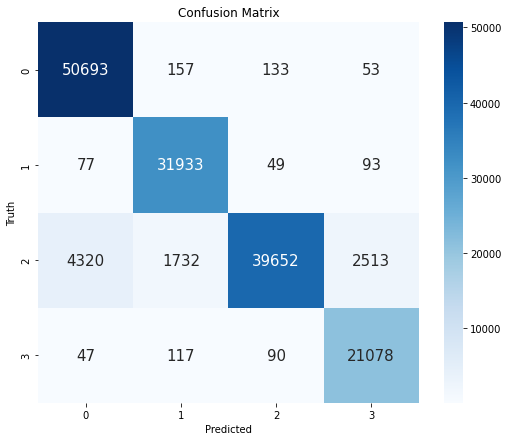

In [114]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_predictions,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()